In [1]:
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import statistics as stat

### Seeing the raw data

In [2]:
def reader(filename):
    global df
    df = pd.read_csv(filename)
    plt.figure(figsize=(15,3))
    plt.title("RAW Data")
    plt.xlabel("Time (millisecond)") 
    plt.ylabel("Sensor Value") 
    plt.plot(df["time_data"], df["tap_data"])
    

### Filtering the tap data

In [3]:
def filter(threshold):

    temp = df["tap_data"]
    ll = []
    for data in temp:
        if data >threshold:
            ll.append(1)
        else :
            ll.append(0)

    df["binary_tap_data"] = ll

### Getting rid of the leading and trailing 0s 

In [4]:
def trimmer():
    global tap
    global time
    tap = df["binary_tap_data"]
    time = df["time_data"]

    first_one_index = next(i for i, x in enumerate(tap) if x == 1)

    last_one_index = len(tap) - 1 - next(i for i, x in enumerate(reversed(tap)) if x == 1)

    # Slice both lists to remove leading and trailing zeros
    tap = tap[first_one_index:last_one_index+1]
    time = time[first_one_index:last_one_index+1]

    plt.figure(figsize=(15,3)) 
    plt.title("Filtered Data")
    plt.xlabel("Time (millisecond)") 
    plt.ylabel("Toouch Sense") 
    plt.plot(time, tap)

### Calculating AT_20 metric

In [5]:
def at20_estimator():
    at_20 = []

    flag = 0

    for tt,tm in zip(tap,time):
        if tt == 1 and flag == 0:
            start_time = tm
            flag = 1
        if tt == 1 and flag == 1:
            end_time = tm
        if tt == 0 and flag == 1:
            flag = 0
            end_time = tm
            at_20.append(end_time-start_time)
        if tt == 0 and flag ==0:
            continue
    
    return at_20

### Calculating IS_20 metric

In [6]:
def is20_estimator():
    is_20 = []

    inverted_tap = [1 if x == 0 else 0 for x in tap]
    flag = 0

    for tt,tm in zip(inverted_tap,time):
        if tt == 1 and flag == 0:
            start_time = tm
            flag = 1
        if tt == 1 and flag == 1:
            end_time = tm
        if tt == 0 and flag == 1:
            flag = 0
            end_time = tm
            is_20.append(end_time-start_time)
        if tt == 0 and flag ==0:
            continue
        
    return is_20

In [90]:
at_20_list_ind =[]
is_20_list_ind =[]

### DRIVER

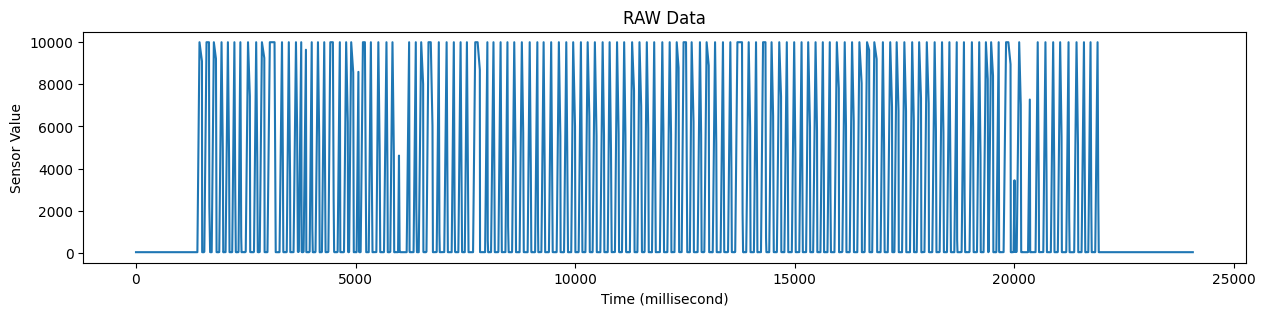

In [119]:
# file = "subj_9_data_index.csv"
# file = "subj_9_data_thumb.csv"
file = "subj_9_data_middle.csv"
# file = "test_data.csv"
reader(file)

KS20 = 122
KS20 = 122
median AT20 = 39.0
median IS20 = 127.0


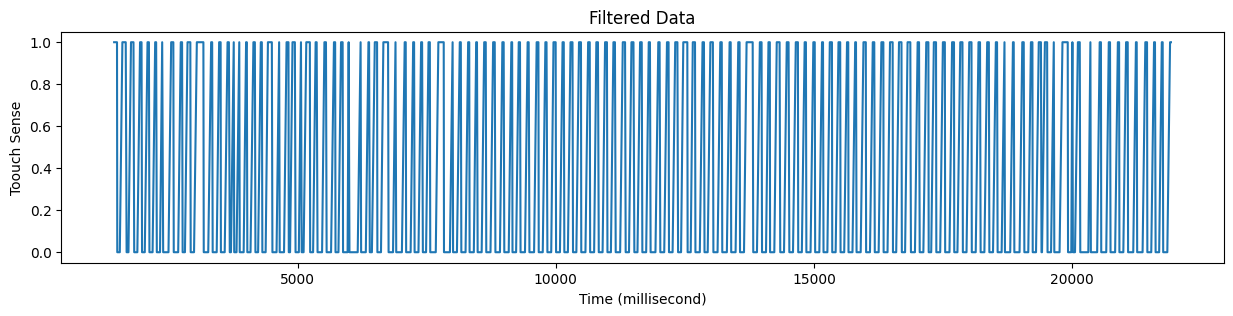

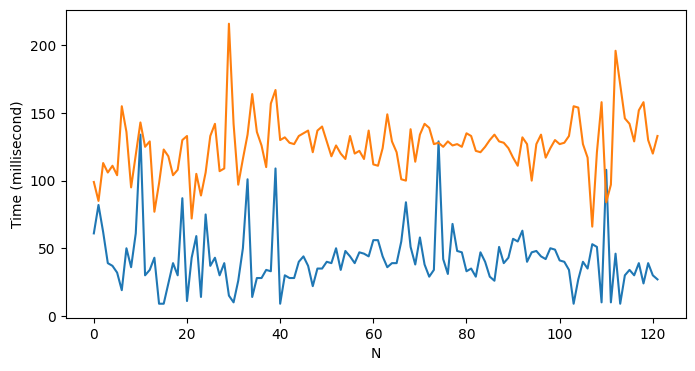

In [120]:
filter(1000)
trimmer()

at_20 = at20_estimator()
is_20 = is20_estimator()

print("KS20 = " + str(len(at_20)))
print("KS20 = " + str(len(is_20)))
print("median AT20 = " + str(stat.median(at_20)))
print("median IS20 = " + str(stat.median(is_20)))

plt.figure(figsize=(8,4))

plt.xlabel("N") 
plt.ylabel("Time (millisecond)") 
plt.plot(at_20)
plt.plot(is_20)

In [121]:
at_20_list_ind.append(at_20)
is_20_list_ind.append(is_20)
len(is_20_list_ind)

9

In [122]:
min_list = []
max_list = []
mean_list = []
median_list = []
mode_list = []
stdev_list = []
variance_list = []
pstdev_list = []
pvariance_list = []
quantiles_list = []

In [123]:
for data in is_20_list_ind:
    ind_min = min(data)
    min_list.append(ind_min)

    ind_max = max(data)
    max_list.append(ind_max)

    ind_mean = stat.mean(data)
    mean_list.append(ind_mean)

    ind_median = stat.median(data)
    median_list.append(ind_median)

    ind_mode = stat.mode(data)
    mode_list.append(ind_mode)

    ind_stdev = stat.stdev(data)
    stdev_list.append(ind_stdev)

    ind_var = stat.variance(data)
    variance_list.append(ind_var)

    ind_pstdev = stat.pstdev(data)
    pstdev_list.append(ind_pstdev)

    ind_pvar = stat.pvariance(data)
    pvariance_list.append(ind_pvar)

    ind_quant = stat.quantiles(data)
    quantiles_list.append(ind_quant)




In [124]:
len(is_20_list_ind)

9

In [125]:
dataframe = {'mid_min': min_list, 
             'mid_max': max_list,
             'mid_mean': mean_list,
             'mid_median': median_list,
             'mid_mode': mode_list,
             'mid_stdev': stdev_list,
             'mid_variance': variance_list,
             'mid_pstdev': pstdev_list,
             'mid_pvariance': pvariance_list,
             'mid_quantiles': quantiles_list,
             }
df = pd.DataFrame(dataframe)
print(df)

   mid_min  mid_max    mid_mean  mid_median  mid_mode  mid_stdev  \
0       62      269  125.228070       125.0       126  26.521668   
1       54      271  127.525547       125.0       121  24.677949   
2       63      254  122.533333       123.0       111  21.234601   
3      106      182  145.383333       143.5       141  15.769976   
4       98      301  153.061404       150.0       153  21.892450   
5       63      252  121.409449       118.0       116  18.050350   
6       45      582  123.479675       117.0       122  49.626366   
7       64      340  125.588785       121.0       118  28.902880   
8       66      216  125.745902       127.0       133  21.138880   

   mid_variance  mid_pstdev  mid_pvariance            mid_quantiles  
0    703.398851   26.405088     697.228686   [111.0, 125.0, 132.25]  
1    609.001181   24.587719     604.555917    [115.0, 125.0, 138.0]  
2    450.908277   21.163701     447.902222    [111.0, 123.0, 130.5]  
3    248.692157   15.704131     246.619

In [126]:
# df.to_csv('is20_middle_stats.csv', index=False)

In [132]:
df_ind = pd.read_csv("at20_index_stats.csv")
df_thumb = pd.read_csv("at20_thumb_stats.csv")
df_mid = pd.read_csv("at20_middle_stats.csv")

# df_ind_is = pd.read_csv("is20_index_stats.csv")
# df_thumb_is = pd.read_csv("is20_thumb_stats.csv")
# df_mid_is = pd.read_csv("is20_middle_stats.csv")

In [133]:
df_at_20 = [df_ind["ind_mean"], df_thumb["th_mean"], df_mid["mid_mean"]]
# df_is_20 = [df_ind_is["ind_mean"], df_thumb_is["th_mean"], df_mid_is["mid_mean"]]

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (3).

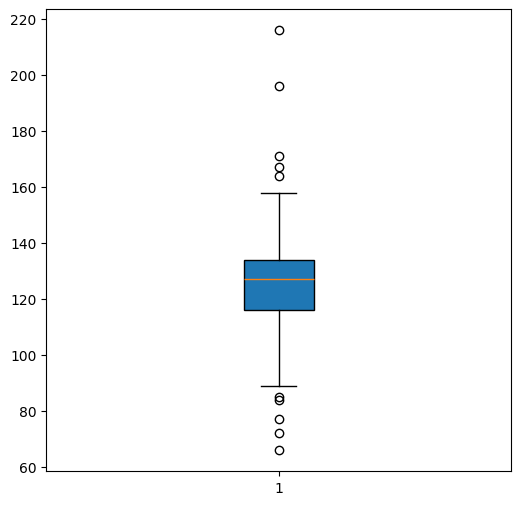

In [134]:
fig, ax = plt.subplots(figsize = (6,6))
ax.boxplot(data, patch_artist=True)
ax.set_xticklabels(['Thumb', 'Index', 'Middle'])
ax.set_xlabel("FINGERS")
ax.set_ylabel("Number of Touches")
ax.set_title("Parameter: AT20")